## GCN (PyTorch) with random graphs

In [1]:
import gcn
import torch
import matplotlib.pyplot as plt

from torch import nn
from pprint import pprint

In [2]:
# torch.manual_seed(19870314)

### Generate a random graph

In [3]:
num_nodes = 16
edges = []

degrees = torch.randint(1, 3, (num_nodes,))
for v, num_neighbors in enumerate(degrees):
    for u in torch.randint(0, num_nodes, (num_neighbors,)):
        if v == u:
            continue
        edges.append((v, u.item()))

print(f"nodes: {num_nodes} {list(range(num_nodes))}")
print(f"edges: {len(edges)} {edges}")

nodes: 16 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
edges: 24 [(0, 14), (0, 13), (1, 5), (2, 3), (2, 15), (3, 14), (4, 15), (4, 7), (5, 10), (6, 12), (7, 14), (8, 15), (9, 0), (9, 10), (10, 6), (10, 0), (11, 7), (11, 1), (12, 7), (12, 10), (13, 12), (14, 12), (14, 13), (15, 3)]


### Build adjacency matrix

In [4]:
adj = torch.zeros(num_nodes, num_nodes)
for v, u in edges:
    # undirected edges
    adj[v][u] = 1
    adj[u][v] = 1

print(f"adjacency: {adj.shape}")
print(adj)

adjacency: torch.Size([16, 16])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0.],
      

### Assign ground truth labels

In [5]:
num_classes = 3
labels = torch.randint(0, num_classes, (num_nodes,))
print(f"labels: {labels}")

labels: tensor([2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])


### Plot as points to visualize

In [6]:
def plot_graph(adj, points, labels):
    for u, row in enumerate(adj):
        for v, connected in enumerate(row):
            if connected == 0:
                continue
            point_u = points[u]
            point_v = points[v]
            xs = [point_u[0], point_v[0]]
            ys = [point_u[1], point_v[1]]
            plt.plot(xs, ys, linewidth=1, c='gray')
    num_nodes = adj.shape[0]
    area = (torch.zeros(num_nodes) + 10) ** 2
    xs = points[:,0]
    ys = points[:,1]
    plt.scatter(xs, ys, s=area, c=labels)
    plt.show()

In [7]:
points = torch.rand(num_nodes, 2)
print(f"points:\n{points}")

points:
tensor([[0.5275, 0.8883],
        [0.3986, 0.9817],
        [0.4591, 0.2794],
        [0.2018, 0.8974],
        [0.4091, 0.5699],
        [0.2958, 0.5520],
        [0.4806, 0.3740],
        [0.2243, 0.4254],
        [0.0809, 0.2621],
        [0.0044, 0.4830],
        [0.2990, 0.7758],
        [0.2710, 0.9346],
        [0.1798, 0.7198],
        [0.8183, 0.3219],
        [0.4937, 0.8050],
        [0.7858, 0.8269]])


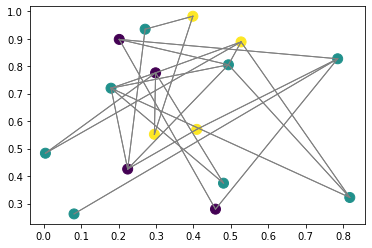

In [8]:
plot_graph(adj, points, labels)

### Setup GCN model

In [9]:
model = gcn.GraphConvNet(adj, 2, num_nodes, num_classes)
model

GraphConvNet(
  (prop_rule): Sequential(
    (0): GCNLayer(
      (linear): Linear(in_features=16, out_features=16, bias=False)
    )
    (1): ReLU()
    (2): GCNLayer(
      (linear): Linear(in_features=16, out_features=3, bias=False)
    )
  )
)

### Setup inputs nodes with no features

In [10]:
X = torch.eye(num_nodes)
# print(X)
print(X.shape)

torch.Size([16, 16])


### Feed inputs foward in model

In [11]:
logits = model(X)
print(logits)
print(logits.shape)

tensor([[-5.0283e-03,  1.4150e-02, -1.2647e-02],
        [ 2.8415e-02,  3.7320e-02,  2.7461e-02],
        [-3.7645e-03,  1.9165e-02,  2.7785e-02],
        [-5.6838e-03,  1.6589e-02,  2.2416e-02],
        [ 1.3806e-02,  3.4681e-02, -3.0891e-03],
        [ 1.2054e-02,  3.7790e-02,  1.5421e-02],
        [-2.3076e-03,  1.5844e-02, -2.5194e-02],
        [ 1.5715e-02,  2.6507e-02, -5.7749e-03],
        [ 7.0788e-03,  1.1807e-02,  1.4102e-02],
        [ 8.3376e-04,  2.1446e-02, -8.3919e-03],
        [ 4.9164e-03,  3.2720e-02, -1.6716e-02],
        [ 2.9227e-02,  2.8415e-02,  1.0146e-02],
        [-2.2978e-03,  1.4068e-02, -3.0962e-02],
        [-8.2845e-03,  6.7823e-05, -1.2682e-02],
        [-4.6713e-03,  1.0318e-02, -9.8822e-03],
        [ 1.8624e-03,  3.3132e-02,  2.6854e-02]], grad_fn=<MmBackward>)
torch.Size([16, 3])


### Classify the nodes

In [12]:
softmax = nn.Softmax(dim=1)
probs = softmax(logits)
print(probs)
print(probs.shape)

tensor([[0.3320, 0.3385, 0.3295],
        [0.3324, 0.3354, 0.3321],
        [0.3273, 0.3349, 0.3378],
        [0.3278, 0.3351, 0.3371],
        [0.3329, 0.3399, 0.3273],
        [0.3301, 0.3387, 0.3312],
        [0.3338, 0.3399, 0.3263],
        [0.3345, 0.3381, 0.3274],
        [0.3320, 0.3336, 0.3344],
        [0.3320, 0.3390, 0.3290],
        [0.3326, 0.3420, 0.3255],
        [0.3355, 0.3353, 0.3292],
        [0.3346, 0.3402, 0.3252],
        [0.3329, 0.3357, 0.3314],
        [0.3322, 0.3373, 0.3305],
        [0.3271, 0.3375, 0.3354]], grad_fn=<SoftmaxBackward>)
torch.Size([16, 3])


### Check against ground truth

In [13]:
y_pred = probs.argmax(dim=1)
correct = (y_pred == labels).type(torch.float).sum().item()
accuracy = (correct / num_nodes) * 100

print(f"y_predicted: {y_pred}")
print(f"true_labels: {labels}")
print(f"accuracy: {accuracy:>0.1f}%")

y_predicted: tensor([1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1])
true_labels: tensor([2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])
accuracy: 37.5%


### Try to plot it

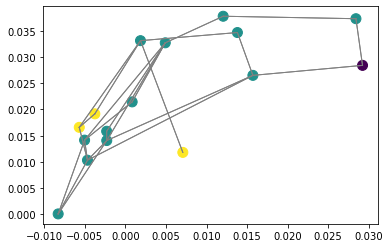

In [14]:
plot_graph(adj, logits.detach().numpy(), y_pred)

### Let's do some training

In [15]:
batch_size = num_nodes
learning_rate = 0.01
epochs = 200

In [16]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [17]:
for i in range(epochs):
    print(f"Epoch {i+1:<3} ------")
    gcn.train(X, labels, model, loss_fn, optimizer)
    gcn.evaluate(X, labels, model)
    print()
print("done")

Epoch 1   ------
loss: 1.097328
accuracy: 50.0%

Epoch 2   ------
loss: 1.093125
accuracy: 56.2%

Epoch 3   ------
loss: 1.088867
accuracy: 56.2%

Epoch 4   ------
loss: 1.084389
accuracy: 56.2%

Epoch 5   ------
loss: 1.079687
accuracy: 56.2%

Epoch 6   ------
loss: 1.074804
accuracy: 56.2%

Epoch 7   ------
loss: 1.069723
accuracy: 56.2%

Epoch 8   ------
loss: 1.064277
accuracy: 56.2%

Epoch 9   ------
loss: 1.058507
accuracy: 56.2%

Epoch 10  ------
loss: 1.052476
accuracy: 56.2%

Epoch 11  ------
loss: 1.046287
accuracy: 56.2%

Epoch 12  ------
loss: 1.039842
accuracy: 56.2%

Epoch 13  ------
loss: 1.033195
accuracy: 56.2%

Epoch 14  ------
loss: 1.026300
accuracy: 56.2%

Epoch 15  ------
loss: 1.019271
accuracy: 56.2%

Epoch 16  ------
loss: 1.012214
accuracy: 56.2%

Epoch 17  ------
loss: 1.005212
accuracy: 56.2%

Epoch 18  ------
loss: 0.998410
accuracy: 56.2%

Epoch 19  ------
loss: 0.991878
accuracy: 56.2%

Epoch 20  ------
loss: 0.985634
accuracy: 56.2%

Epoch 21  ------
los

### Now try visualizing it

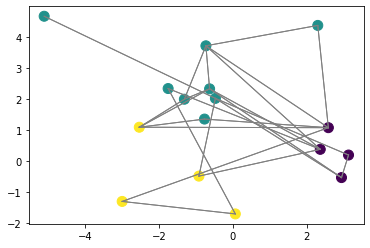

In [18]:
logits = model(X)
y_pred = softmax(logits).argmax(dim=1)

plot_graph(adj, logits.detach().numpy(), y_pred)